In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from scipy import stats

In [48]:
migVSmoney=pd.read_csv("Raw_Data/Migration1VSMoney3YearAVG_abs_ODA.csv")
migVSmoney.head()

,Recipient,Report Year,3yrAverage Money,Average of emigration over all OECD countries
0,Afghanistan,2000.0,1.792700e+08,16550.0
1,Afghanistan,2001.0,1.476900e+08,19853.0
2,Afghanistan,2002.0,2.297433e+08,15143.0
3,Afghanistan,2003.0,6.187133e+08,13528.0
4,Afghanistan,2004.0,1.104600e+09,13267.0


In [49]:
migVSmoney=migVSmoney.sort_values(by="3yrAverage Money")
migVSmoney.head()

,Recipient,Report Year,3yrAverage Money,Average of emigration over all OECD countries
423,China (People's Republic of),2015.0,-5.947167e+08,542545.0
422,China (People's Republic of),2014.0,-4.800067e+08,555715.0
1966,Thailand,2009.0,-3.822500e+08,47420.0
1963,Thailand,2006.0,-3.534067e+08,51225.0
1967,Thailand,2010.0,-3.351633e+08,51010.0


In [50]:
#migVSmoney=migVSmoney[migVSmoney["Recipient"]=="Syrian Arab Republic"]

migVSmoney=migVSmoney[migVSmoney["Report Year"]==2007.0]
print(len(migVSmoney))
migVSmoney.head()

141


,Recipient,Report Year,3yrAverage Money,Average of emigration over all OECD countries
1964,Thailand,2007.0,-1.118900e+08,47282.0
1649,Saint Lucia,2007.0,2.550000e+06,1347.0
1635,Saint Kitts and Nevis,2007.0,2.590000e+06,367.0
2030,Trinidad and Tobago,2007.0,3.130000e+06,8041.0
71,Antigua and Barbuda,2007.0,4.413333e+06,450.0


In [38]:
migVSmoney=migVSmoney.rename(columns={"Average of emigration over all OECD countries":"3yrAverage Migration"})
migVSmoney

,Recipient,Report Year,3yrAverage Money,3yrAverage Migration
423,China (People's Republic of),2015.0,-5.947167e+08,542545.0
422,China (People's Republic of),2014.0,-4.800067e+08,555715.0
1966,Thailand,2009.0,-3.822500e+08,47420.0
1963,Thailand,2006.0,-3.534067e+08,51225.0
1967,Thailand,2010.0,-3.351633e+08,51010.0
1968,Thailand,2011.0,-2.382867e+08,53604.0
1965,Thailand,2008.0,-2.318400e+08,47447.0
1962,Thailand,2005.0,-1.991733e+08,47157.0
1961,Thailand,2004.0,-1.214100e+08,36669.0
1964,Thailand,2007.0,-1.118900e+08,47282.0


In [39]:
migVSmoneyQ=migVSmoney.quantile([.05, .95])
migVSmoneyQ

,Report Year,3yrAverage Money,3yrAverage Migration
0.05,2000.0,1.135000e+07,91.35
0.95,2015.0,1.796413e+09,85362.20


In [40]:
MigrationUPboundary=migVSmoneyQ.iloc[1][2]
MigrationLOWboundary=migVSmoneyQ.iloc[0][2]
MoneyUPboundary=migVSmoneyQ.iloc[1][1]
MoneyLOWboundary=migVSmoneyQ.iloc[0][1]
print(MigrationUPboundary,MigrationLOWboundary)
print(MoneyUPboundary,MoneyLOWboundary)

85362.2 91.35
1796412666.67 11350000.0


In [41]:
df=migVSmoney
len(migVSmoney)

2248

In [42]:
migVSmoneyQ = migVSmoney[(migVSmoney["3yrAverage Money"] > MoneyLOWboundary) & (migVSmoney["3yrAverage Money"] < MoneyUPboundary) ]
df = migVSmoneyQ[(migVSmoneyQ["3yrAverage Migration"] > MigrationLOWboundary) & (migVSmoneyQ["3yrAverage Migration"] < MigrationUPboundary)]
len(df)

1842

In [43]:
# define the data/predictors as the pre-set feature names  
#df = pd.DataFrame(df, columns=["Average Sum of Money"])

# Put the target (housing value -- MEDV) in another DataFrame
#target = pd.DataFrame(df, columns=["Average of emigration over all OECD countries"])

In [44]:
#Shapiro-Wilk
x = df['3yrAverage Money']
y = df["3yrAverage Migration"]

shapiro_results = scipy.stats.shapiro(x)

print(shapiro_results)
shapiro_results = scipy.stats.shapiro(y)

print(shapiro_results)

(0.8041954636573792, 1.4069036581821163e-42)
(0.7269629836082458, 0.0)


In [45]:
x = df['3yrAverage Money']
y = df["3yrAverage Migration"]

levene_results = scipy.stats.levene(x,y)

print(levene_results)


LeveneResult(statistic=1382.1455084372672, pvalue=3.6720484887862546e-257)


In [46]:
import statsmodels.api as sm

X = df['3yrAverage Money']
y = df["3yrAverage Migration"]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     3yrAverage Migration   R-squared:                       0.082
Model:                              OLS   Adj. R-squared:                  0.082
Method:                   Least Squares   F-statistic:                     164.9
Date:                  Mon, 13 Nov 2017   Prob (F-statistic):           3.29e-36
Time:                          14:10:09   Log-Likelihood:                -20472.
No. Observations:                  1842   AIC:                         4.095e+04
Df Residuals:                      1840   BIC:                         4.096e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8004.4650    517.438     15.469      0.000    6989.637    9019.293
3yrAverage Money   1.25e-05   9.74e-07     12.841      0.000    1.06e-05    1.44e-05
==============================================================================
Omnibus:                      702.270   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2349.511
Skew:                           1.934   Prob(JB):                         0.00
Kurtosis:                       6.957   Cond. No.                     7.27e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

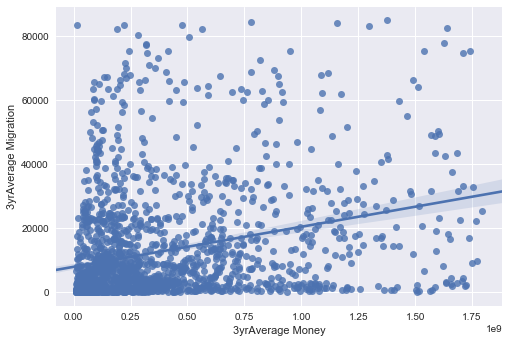

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='3yrAverage Money', y="3yrAverage Migration", data=df)
plt.show()